# Final Data Scientist Challenge

Task: We need to predict the medical charges for an insurance company using Linear regression. A dataset called insurance is provided.

## Solution

In [1]:
#Here we import the neccesary libraries neccessary in the project

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#The data is loaded into the system
df = pd.read_csv("insurance.csv")

In [3]:
# The data is assessed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the data information presented, the data do not have any missing values and the data type are approprately presented. Each data factor has 1338 values and the file contains 7 variables while the charges variable is the key variable in this analysis which is sometimes called the depent variable.

In [33]:
# Describing the data is crucial to understand 
# the nature or distrubition of the numerical factors present
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The summary statistics showed the Count, mean, standard devaition and quantiles of the data for age, bmi, number of children and charges which are the numerical values

In [5]:
# viewing the data is essenstial to study or have an eye scan of whats found in the data.
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## a) Find the summary statistics of the variable charges in the dataset

In [6]:
# Summary statistics of charges
charges_summary = df['charges'].describe()
print(charges_summary)

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


## b) Display a table that contains the number of people in each region

In [7]:
# Number of people in each region
region_counts = df['region'].value_counts()
print(region_counts)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


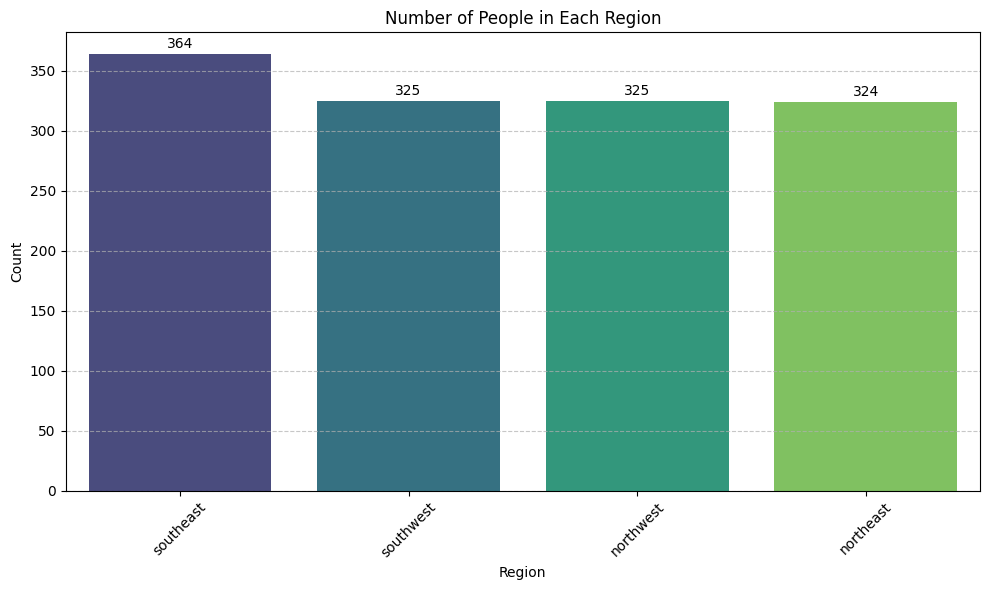

In [8]:

# Number of people in each region
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Create a bar plot with data labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', data=region_counts, palette='viridis')
plt.title('Number of People in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Add data labels
for index, row in region_counts.iterrows():
    plt.text(index, row['Count'] + 5, row['Count'], ha='center', color='black')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The number of people in each region shows that the southeast has the highest response and there is no much difference in the number of people in the southwest, northwest and northeast

## c) Visualize the relationship among all features using a scatterplot matrix

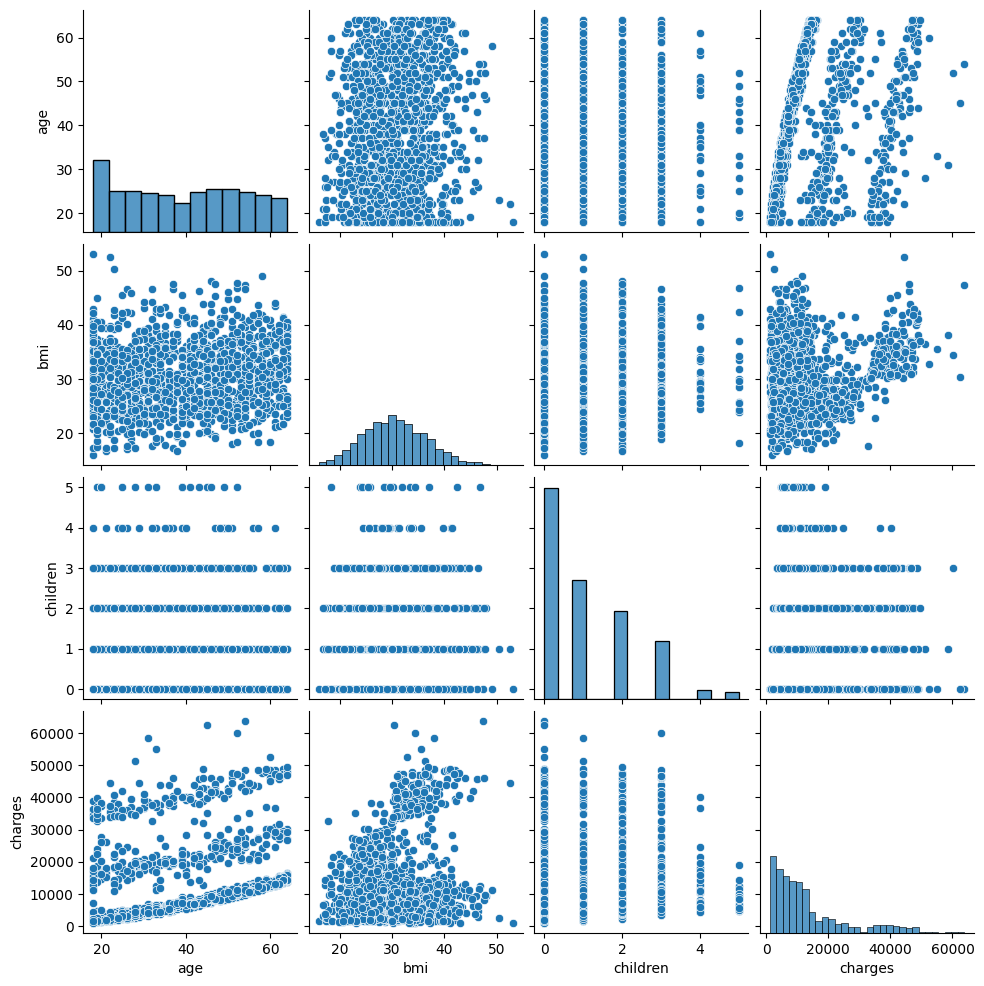

In [9]:
# Scatterplot matrix using seaborn
sns.pairplot(df)

From the scatter plot we could notice a positve week relationship between charges and age and bmi, charges and number of children show no sign of a relationship. We could actually check the correlation values to confirm this relationship.

In [61]:
df.corr()

C:\Users\Data Analyst\AppData\Local\Temp\ipykernel_10288\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


The correlation figures reveal the relationship between insurance charges and other numerical variables in the dataset. Age exhibits a moderate positive correlation with charges (0.299), indicating that as individuals age, their medical charges tend to increase. BMI shows a weaker positive correlation with charges (0.198), suggesting that higher BMIs may be associated with slightly higher medical charges.
Conversely, the number of children demonstrates a very weak positive correlation with charges (0.068), implying little to no meaningful relationship between the number of children and medical charges. These insights underscore the importance of age and BMI as factors influencing medical charges, while the number of children appears to have minimal impact.

## d) Train a model on the data

The one hot encoding method was employed on categorical variables in the dataset. One-hot encoding is a process used to convert categorical data into a numerical format that can be provided to machine learning algorithms to improve model performance.

In [38]:
# Convert categorical variables into numerical values using one-hot encoding
X = pd.get_dummies(df.drop(columns=['charges']))
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   uint8  
 4   sex_male          1338 non-null   uint8  
 5   smoker_no         1338 non-null   uint8  
 6   smoker_yes        1338 non-null   uint8  
 7   region_northeast  1338 non-null   uint8  
 8   region_northwest  1338 non-null   uint8  
 9   region_southeast  1338 non-null   uint8  
 10  region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.9 KB


In [40]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


## e) Evaluate the model performance

In [41]:
# Evaluate model performance
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

Train R^2 score: 0.7423980090600258
Test R^2 score: 0.7696118054369012


Since this is a regession model we can use the r-squared as a measure of performance.

A R-Squared score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (in this case, charges) that is predictable from the independent variables (features) in the model. It ranges from 0 to 1, where 1 indicates a perfect fit.

These scores indicate that the model explains approximately `74.2%` of the variance in the training data and `77.0%` of the variance in the testing data.

## f) Improve the model performance by Adding nonlinear relationship (Hint consider only age as input)

In [42]:
# Adding nonlinear relationship (polynomial features for age)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[['age']])
X_test_poly = poly.transform(X_test[['age']])

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

train_score_poly = model_poly.score(X_train_poly, y_train)
test_score_poly = model_poly.score(X_test_poly, y_test)
print("Train R^2 score (with polynomial features):", train_score_poly)
print("Test R^2 score (with polynomial features):", test_score_poly)

Train R^2 score (with polynomial features): 0.0866591719028641
Test R^2 score (with polynomial features): 0.09686048215505827


The addition of polynomial features to capture nonlinear relationships, specifically for the age feature, seems to have decreased the model's performance, as indicated by the reduced 𝑅-Squared scores.
  
These scores indicate that the model's ability to explain the variance in the dependent variable (charges) has decreased significantly after adding polynomial features for age. This suggests that the polynomial features might not have effectively captured the underlying relationships between age and charges.

## Since smoking and obesity may have a harmful impact, we assume the combination of the two may be worse. Build a model with the interaction effects of smokers and obesity (Obesity is considered for BMI > 30)
    Improve your regression model by putting a, and b together

In [37]:
# Convert categorical variables into numerical values using one-hot encoding
insurance_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Create interaction feature for smokers and obesity
insurance_encoded['smoker_obese_interaction'] = insurance_encoded['smoker_yes'] * insurance_encoded['bmi'].apply(lambda x: 1 if x > 30 else 0)

# Drop unnecessary columns
X_interaction = insurance_encoded.drop(columns=['charges'])

# Split data into training and testing sets
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interaction, y, test_size=0.3, random_state=42)

# Train linear regression model with interaction feature
model_int = LinearRegression()
model_int.fit(X_train_int, y_train_int)

# Evaluate model
train_score_int = model_int.score(X_train_int, y_train_int)
test_score_int = model_int.score(X_test_int, y_test_int)
print("Train R^2 score (with interaction feature):", train_score_int)
print("Test R^2 score (with interaction feature):", test_score_int)


Train R^2 score (with interaction feature): 0.8602102326429981
Test R^2 score (with interaction feature): 0.8763295063962366


These scores indicate that the model, which incorporates the interaction feature between smoking and obesity, explains approximately 86.0% of the variance in the training data and approximately 88.0% of the variance in the testing data.

These results suggest that the model with interaction effects provides a good fit to the data and effectively captures the relationship between the predictors and the target variable. This is also an improvement on the first two models created.

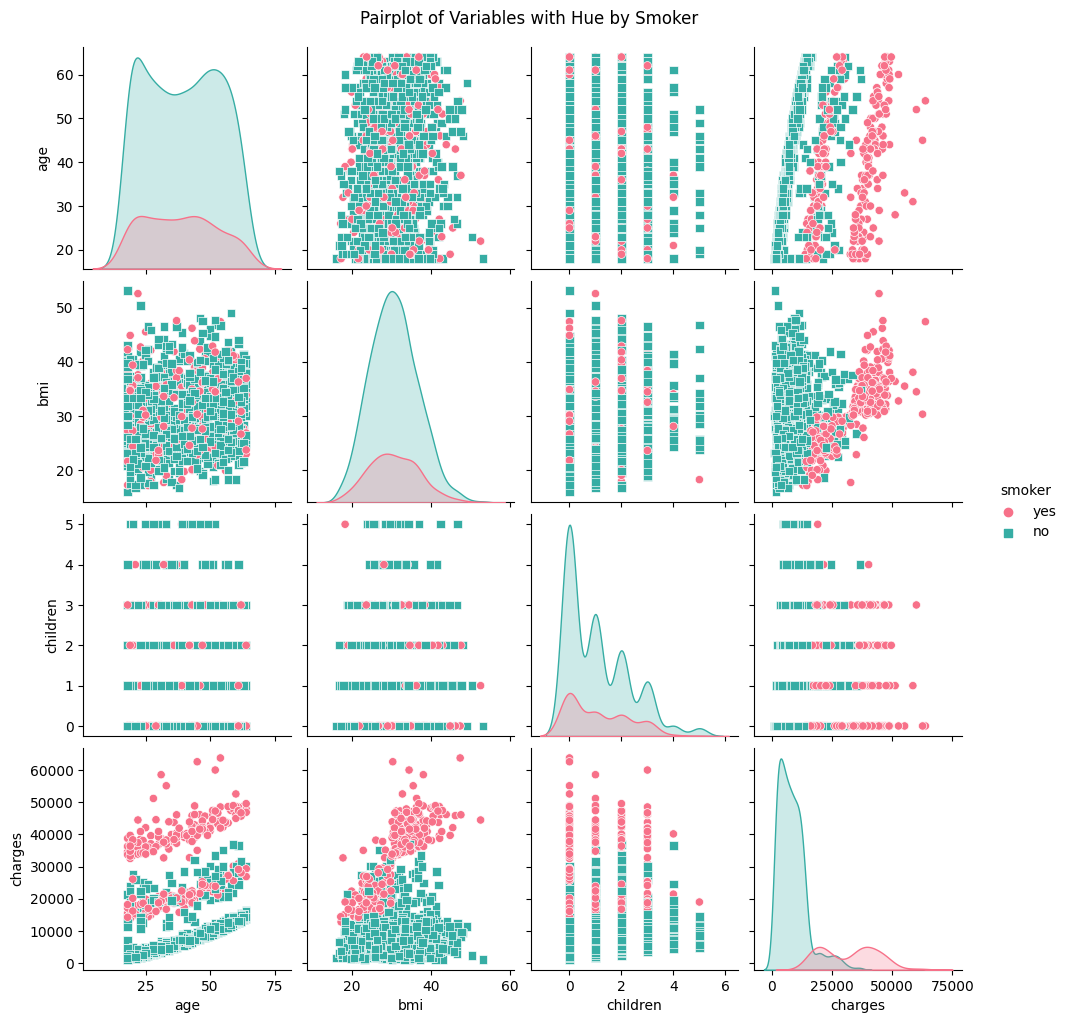

In [16]:
# Create a pair plot to visualize the relationship between variables
sns.pairplot(df, hue='smoker', palette='husl', markers=["o", "s"])
plt.suptitle('Pairplot of Variables with Hue by Smoker', y=1.02)
plt.show()

# Additional Insight

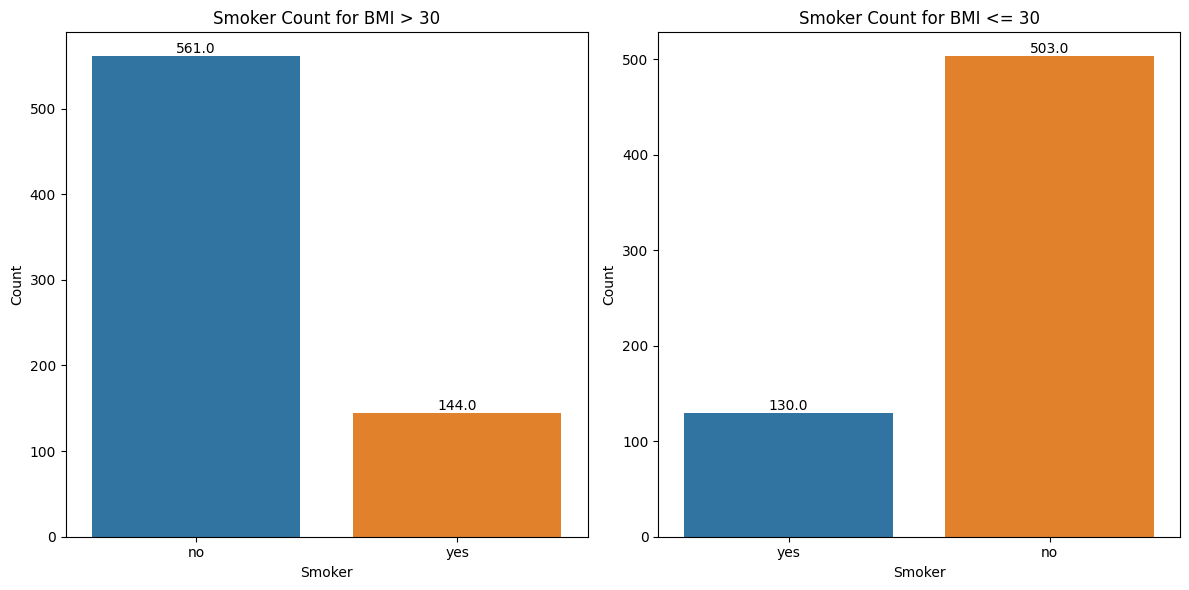

In [52]:
# Filter data for BMI > 30 and BMI <= 30
df_bmi_gt_30 = df[df['bmi'] > 30]
df_bmi_le_30 = df[df['bmi'] <= 30]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for BMI > 30
sns.countplot(x='smoker', data=df_bmi_gt_30, ax=axes[0])
axes[0].set_title('Smoker Count for BMI > 30')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')

# Annotate data values for BMI > 30
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Plot for BMI <= 30
sns.countplot(x='smoker', data=df_bmi_le_30, ax=axes[1])
axes[1].set_title('Smoker Count for BMI <= 30')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Count')

# Annotate data values for BMI <= 30
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The plots show that there were more smokers with BMI over 30 although no much difference. The chart also identifies that there are more individuals who do not smoker with BMI over 30 as well.

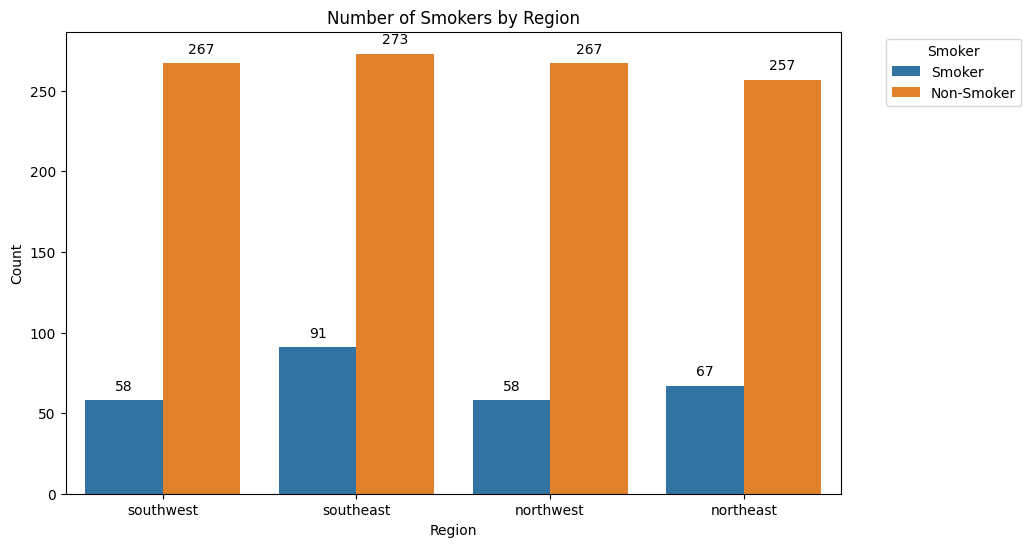

In [53]:
# Plotting the number of smokers in each region
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='region', hue='smoker', data=df)
plt.title('Number of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Smoker', 'Non-Smoker'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding data values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

plt.show()

The chart above indicates that there were more smokers and non smoker in the southeast region than in any other region.

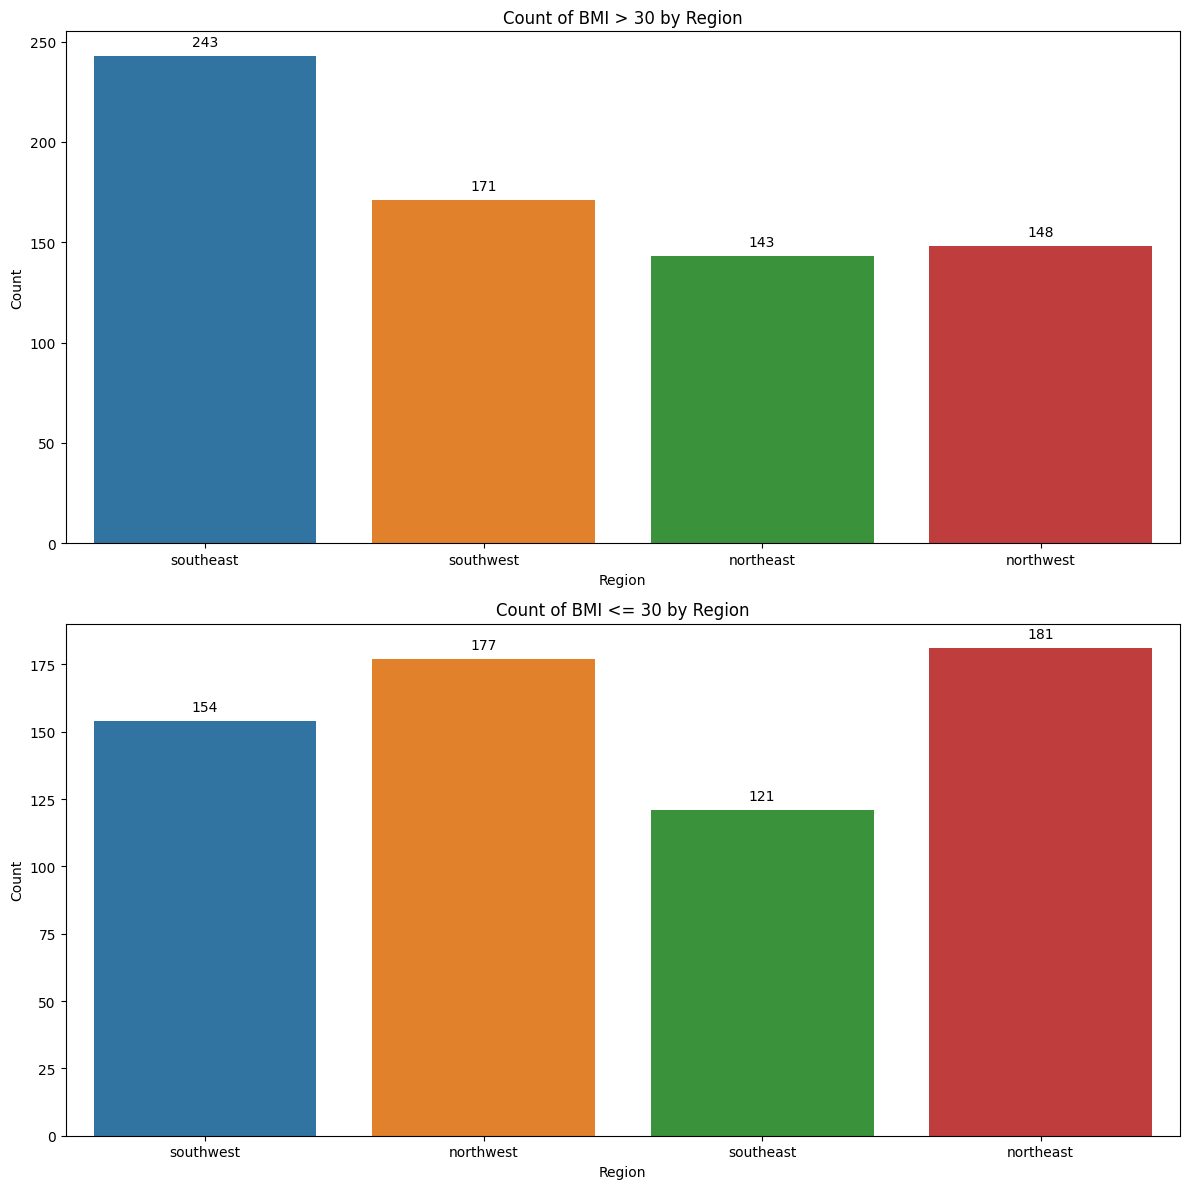

In [57]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for BMI > 30
sns.countplot(x='region', data=df_bmi_gt_30, ax=axes[0])
axes[0].set_title('Count of BMI > 30 by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')

# Annotate data labels for BMI > 30
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Plot for BMI <= 30
sns.countplot(x='region', data=df_bmi_le_30, ax=axes[1])
axes[1].set_title('Count of BMI <= 30 by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')

# Annotate data labels for BMI <= 30
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

The first chart informs us that there were more individuals with BMI > 30 in the southeast followed by southwest, northeast and northwest region while the second chart indicates that there are more individuals with BMI <= 30 in the northeast region followed by northwest, southwest and south east.

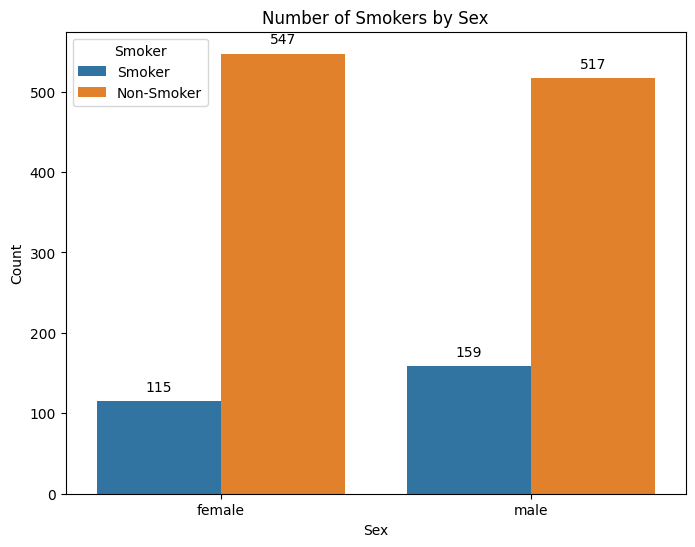

In [55]:
# Plotting the number of smokers by sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Number of Smokers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Smoker', 'Non-Smoker'])

# Adding data labels above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

plt.show()

The chart indicates more femal non smokers compared to male and more male smokers compared to female.

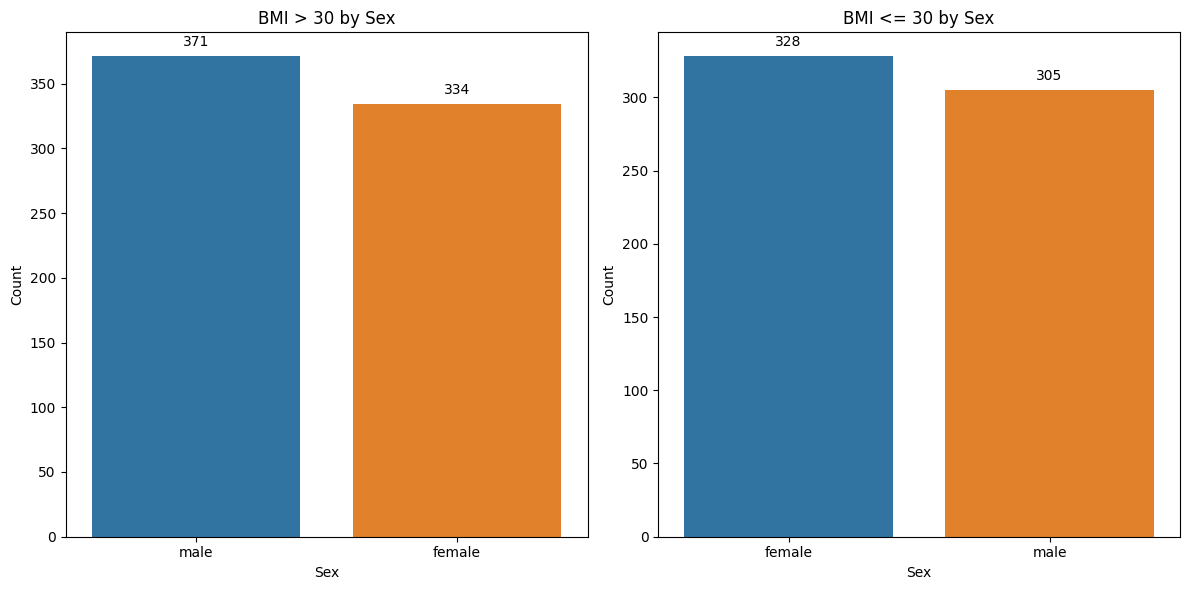

In [56]:
# Filter data for BMI > 30 and BMI <= 30
df_bmi_gt_30 = df[df['bmi'] > 30]
df_bmi_le_30 = df[df['bmi'] <= 30]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for BMI > 30
sns.countplot(x='sex', data=df_bmi_gt_30, ax=axes[0])
axes[0].set_title('BMI > 30 by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Add data labels for BMI > 30
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

# Plot for BMI <= 30
sns.countplot(x='sex', data=df_bmi_le_30, ax=axes[1])
axes[1].set_title('BMI <= 30 by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')

# Add data labels for BMI <= 30
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.tight_layout()
plt.show()

The chart also indicates more male individuals had a BMI higher than 30 and more females had a BMI <= 30.

# Summary

The initial exploration of the insurance dataset revealed valuable insights into the distribution of demographic and lifestyle factors among the individuals included. This included a comprehensive summary of the charges variable, providing key statistics essential for understanding the cost distribution.

- The visualization of the number of individuals in each region provided a clear picture of the dataset's geographical distribution, with the Southeast region having the highest representation.

- Following the initial analysis, the exploratory data analysis (EDA) went deeper into understanding the relationships between different variables/factors. The scatterplot matrix offered a visual representation of pairwise relationships, aiding in identifying potential correlations or patterns among features. Although there were no indication of a strong relationship between the variables, it can be used to check critical relationships between variables.

- Model training and evaluation formed a crucial part of the analysis, where a linear regression model was trained on the dataset. Through one-hot encoding, categorical variables such as `sex`, `region`and `smoking status` were transformed into numerical format, facilitating model training. The evaluation of model performance using R-squared scores provided insights into the model's ability to explain variance in the target variable, charges. This initial model achieved moderate performance, indicating room for improvement.

- Subsequent model improvement strategies aimed to enhance predictive accuracy by capturing non-linear relationships and interaction effects were employed. Polynomial features were introduced to account for potential non-linear relationships, particularly for the age feature. However, the addition of polynomial features led to a huge decline in model performance, highlighting the importance of careful feature selection.

- In contrast, the incorporation of an interaction feature between smoker status and obesity (BMI > 30) yielded promising results. This interaction feature, reflecting the combined impact of smoking and obesity, significantly improved the models performance. The final model demonstrated superior predictive capability, as evidenced by higher R-squared scores on both training and testing datasets.

Beyond model performance, additional insights were gleaned from visualizations exploring relationships between variables. These insights shed light on the distribution of smokers by region and sex, as well as the prevalence of obesity among different demographic groups.

- The exploration of smokers by region shed light on geographical variations in smoking habits, a crucial determinant of healthcare costs. The visualization revealed that the Southeast region had the highest number of smokers, suggesting potential regional disparities in health behaviors that could impact insurance charges.

- Similarly, examining the distribution of smokers by gender provided insights into gender disparities in smoking prevalence, which can have significant implications for healthcare costs. The visualization revealed that while there were more male smokers overall, there were also notable numbers of female smokers. Understanding these gender-specific patterns is essential for tailoring insurance policies and healthcare interventions to address the unique needs of different demographic groups.

- Furthermore, the analysis of BMI distribution by gender highlighted disparities in obesity prevalence, another key driver of healthcare costs. The visualization showed that more male individuals had a BMI above 30, indicating a higher prevalence of obesity among males. Understanding these gender-specific differences in obesity rates is critical for designing targeted interventions aimed at preventing and managing obesity-related health conditions.